In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

In [2]:
underground_activity = pd.read_csv("data/london_underground_activity.csv")
underground_stations = pd.read_csv("data/london_underground_station_info.csv")

In [4]:
underground_activity.head()

,year,nlc,station,area,weekday_entry,weekday_exit,saturday_entry,saturday_exit,sunday_entry,sunday_exit,annual_entry_and_exit
0,2007,500,Acton Town,Ealing,9205,8899.0,6722,6320,4427,4304,5.77
1,2007,502,Aldgate,City of London,9887,10397.0,2191,2587,1484,1772,5.57
2,2007,503,Aldgate East,Tower Hamlets,12820,12271.0,7040,6220,5505,5000,7.66
3,2007,505,Alperton,Brent,4611,4719.0,3354,3450,2433,2503,3.01
4,2007,506,Amersham,Chiltern,4182,3938.0,1709,1585,1004,957,2.34


In [5]:
underground_stations.head()

,station,line,local_authority,zone,opened
0,Acton Town,District,Ealing,3,1879-07-01
1,Aldgate,Metropolitan[a],City of London,1,1876-11-18
2,Aldgate East,Hammersmith & City[d],Tower Hamlets,1,1884-10-06
3,Alperton,Piccadilly[h],Brent,4,1903-06-28
4,Amersham,Metropolitan,Chiltern,9,1892-09-01


In [7]:
underground_pivot = underground_activity.pivot(index="station", columns="year", values="annual_entry_and_exit")

In [11]:
underground_pivot.dropna().to_csv("data/annual_underground_act.csv")
# underground_pivot.to_csv("data/annual_underground_act.csv")

In [14]:
underground_pca_spatial = pd.read_csv("data/underground_pca_spatial.csv")
underground_pca_temporal = pd.read_csv("data/underground_pca_temporal.csv")

In [16]:
underground_pca_spatial.rename(columns={"Unnamed: 0": "Station"}, inplace=True)

In [20]:
underground_pca_temporal.rename(columns={"Unnamed: 0": "Year"}, inplace=True)
underground_pca_temporal["Year"] = underground_pca_temporal["Year"].apply(lambda x: x[1:])
underground_pca_temporal["Year"] = pd.to_datetime(underground_pca_temporal["Year"], format="%Y")

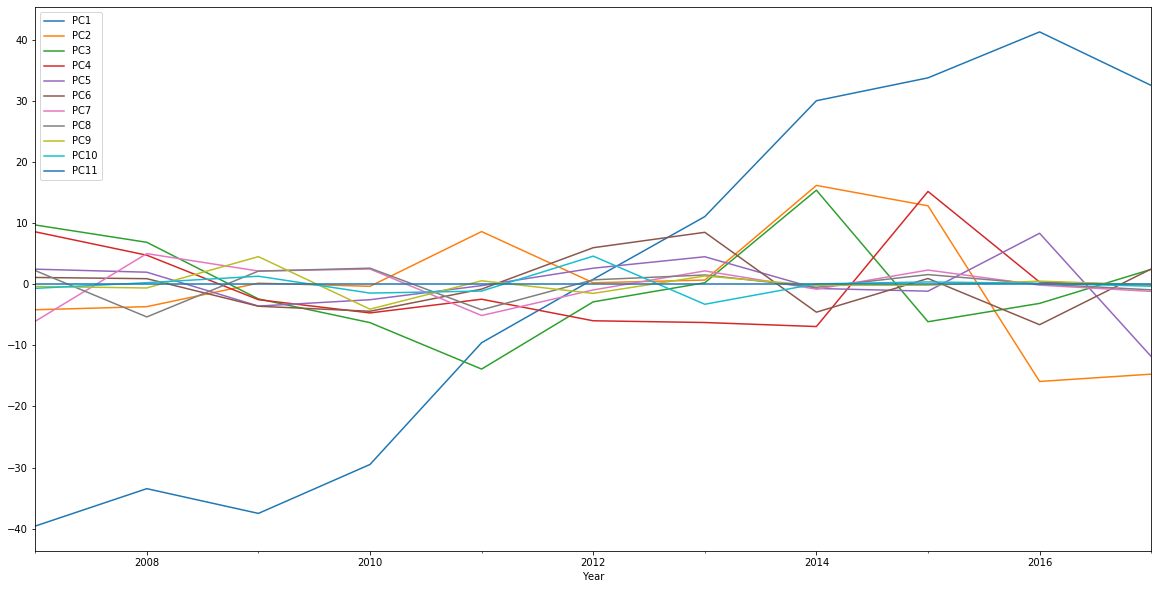

In [23]:
underground_pca_temporal.set_index("Year").plot(figsize=(20,10))

In [25]:
geo_df = gpd.read_file('data/london_boroughs.json')

In [27]:
underground_pca_spatial2 = underground_pca_spatial[underground_pca_spatial.columns[1:]]
spatial_pca_normalized=(underground_pca_spatial2-underground_pca_spatial2.min())/(underground_pca_spatial2.max()-underground_pca_spatial2.min())

In [29]:
spatial_pca_normalized["Station"] = underground_pca_spatial["Station"]

In [30]:
spatiotemporal_df = geo_df.merge(spatial_pca_normalized, left_on="name", right_on="Station", how="left")

C:\Users\josea\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


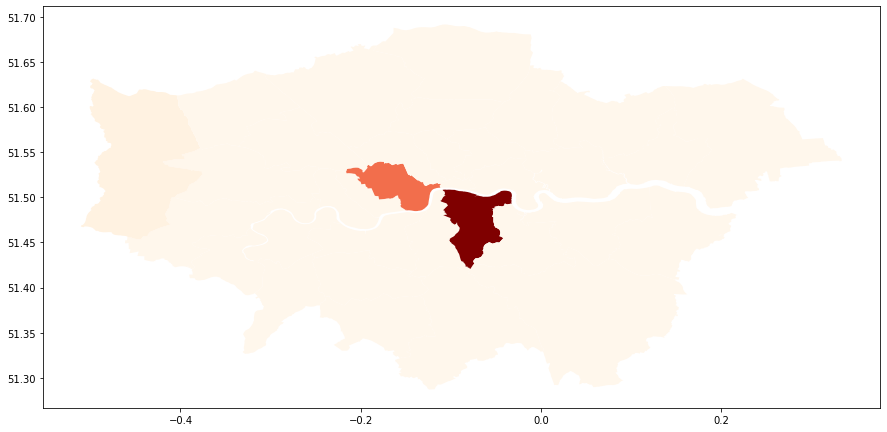

In [32]:
pca_component = "PC2"
spatiotemporal_df.plot(column=pca_component, figsize=(15,20), cmap='OrRd')

In [33]:
spatiotemporal_df

,id,name,code,area_hectares,inner_statistical,geometry,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,Station
0,1,Kingston upon Thames,E09000021,3726.117,0,"MULTIPOLYGON (((-0.33068 51.32901, -0.33059 51...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Croydon,E09000008,8649.441,0,"MULTIPOLYGON (((-0.06402 51.31864, -0.06408 51...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Bromley,E09000006,15013.487,0,"MULTIPOLYGON (((0.01213 51.29960, 0.01196 51.2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Hounslow,E09000018,5658.541,0,"MULTIPOLYGON (((-0.24456 51.48870, -0.24468 51...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Ealing,E09000009,5554.428,0,"MULTIPOLYGON (((-0.41183 51.53408, -0.41188 51...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Havering,E09000016,11445.735,0,"MULTIPOLYGON (((0.15869 51.51219, 0.15871 51.5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Hillingdon,E09000017,11570.063,0,"MULTIPOLYGON (((-0.40407 51.61318, -0.40388 51...",0.015157,0.325581,0.636677,0.485274,0.586480,0.535405,0.624351,0.570789,0.633127,0.482934,0.425953,Hillingdon
7,8,Harrow,E09000015,5046.330,0,"MULTIPOLYGON (((-0.40407 51.61318, -0.40320 51...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Brent,E09000005,4323.270,0,"MULTIPOLYGON (((-0.19657 51.52765, -0.19685 51...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Barnet,E09000003,8674.837,0,"MULTIPOLYGON (((-0.19990 51.67017, -0.19970 51...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
